In [1]:
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

(466, 637, 4)


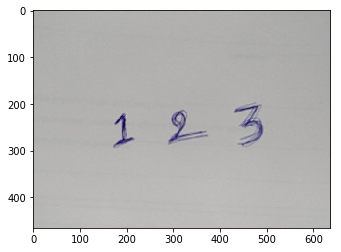

In [3]:
im = io.imread('./image.png')
print (im.shape)

plt.imshow(im)

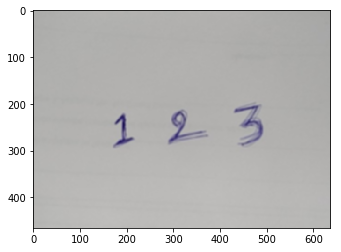

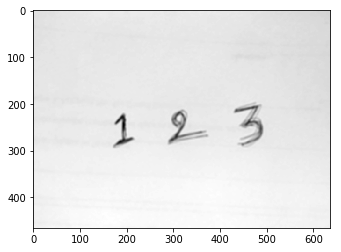

In [4]:
img=cv2.GaussianBlur(im,(5,5),10)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(0)
plt.imshow(img)
plt.figure(1)
plt.imshow(gray,cmap='gray')

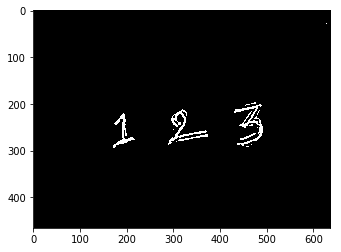

In [10]:
th = 255- cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(th, cmap='gray')

In [11]:
kim=th.copy()

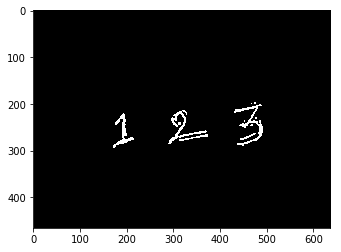

In [12]:
kernel=np.ones((3,3))/9.0
a=cv2.dilate(kim,kernel,iterations=1)
a = cv2.erode(a, kernel, iterations=1)
a = cv2.morphologyEx(a, cv2.MORPH_OPEN, kernel)
a = cv2.morphologyEx(a, cv2.MORPH_CLOSE, kernel)

plt.imshow(a, cmap='gray')


In [15]:
image, cnts, _ = cv2.findContours(a, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=lambda x: cv2.contourArea(x))
print(len(cnts))

12


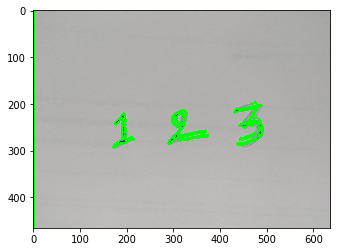

In [16]:
zxzx = im[:, :, :3].copy()
cv2.drawContours(zxzx, cnts, -1, (0,255,0), 3)

plt.imshow(zxzx)

(466, 637, 3) 0.0
683.5 (171, 221, 45, 74)
838.0 (289, 213, 82, 74)
923.0 (430, 202, 61, 88)
930.0 (0, 0, 3, 466)


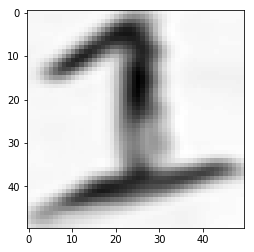

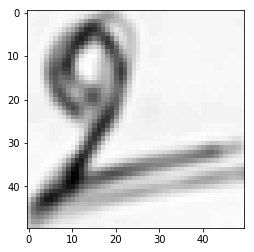

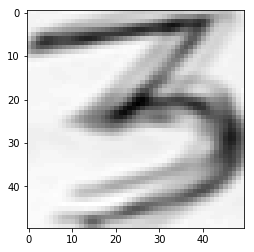

In [23]:
em = np.zeros(gray.shape + (3,), dtype=np.uint8)
print (em.shape, em.mean())
kk = 0
for ix in cnts:
    if cv2.contourArea(ix) > 200:
        print (cv2.contourArea(ix), cv2.boundingRect(ix))
        x, y, w, h = cv2.boundingRect(ix)
        if np.abs(w-h) < 150:
            plt.figure(kk)
            section = gray[y:y+h, x:x+w]
            section = cv2.resize(section, (50, 50))
            plt.imshow(section, cmap='gray')
            kk += 1
            cv2.drawContours(em, [ix], -1, (0, 255, 0), 3)

